In [51]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Goal:
### Gain insights into similarity between countries and regions of the world by experimenting with different cluster amounts. What do these clusters represent?
### Note: There is no 100% right answer

In [52]:
url = 'https://github.com/baothanhquach1661/DataSet/blob/main/CIA_Country_Facts.csv?raw=true'
df = pd.read_csv(url)

In [53]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


### Exploratory Data

#### Task: Explore the rows and columns of the data as well as the data types of the columns.

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [55]:
df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


#### Task: create a histogram of the Population column

<AxesSubplot:xlabel='Population', ylabel='Count'>

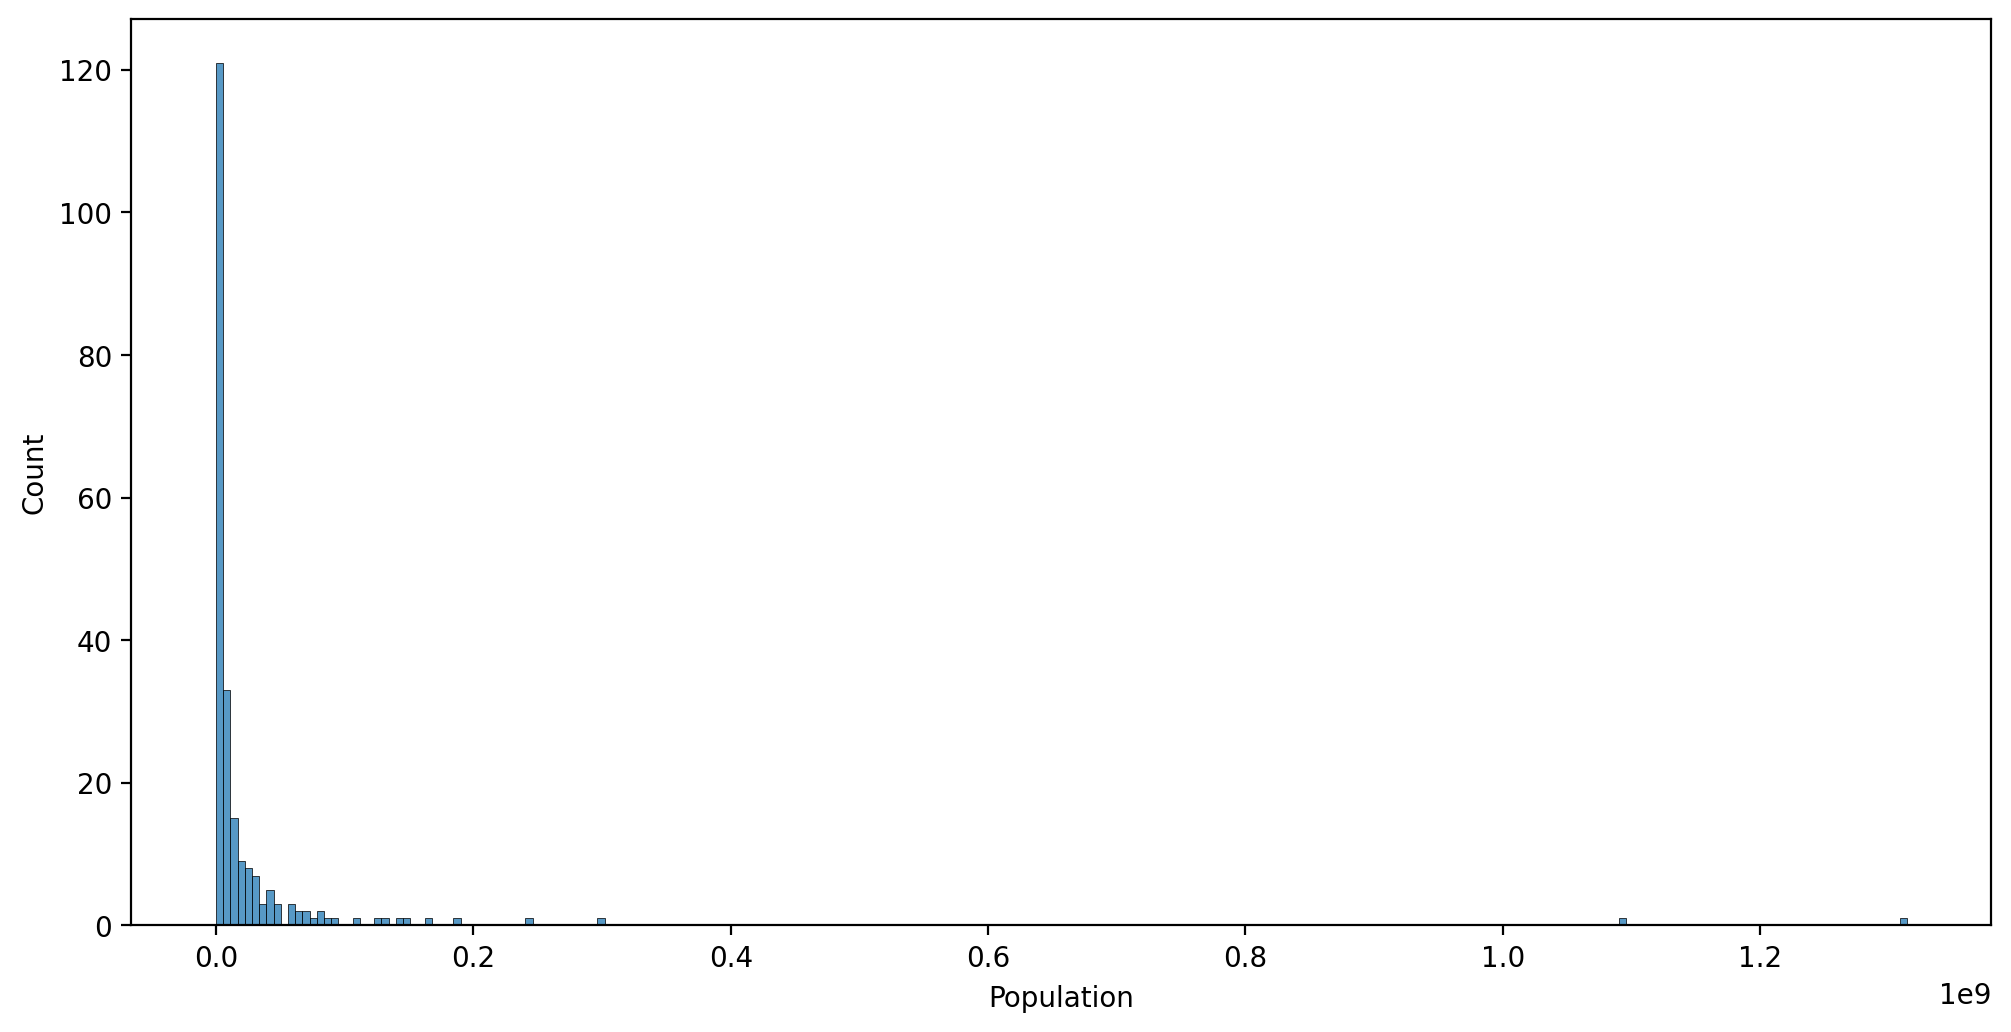

In [56]:
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data=df, x='Population')

<AxesSubplot:xlabel='Population', ylabel='Count'>

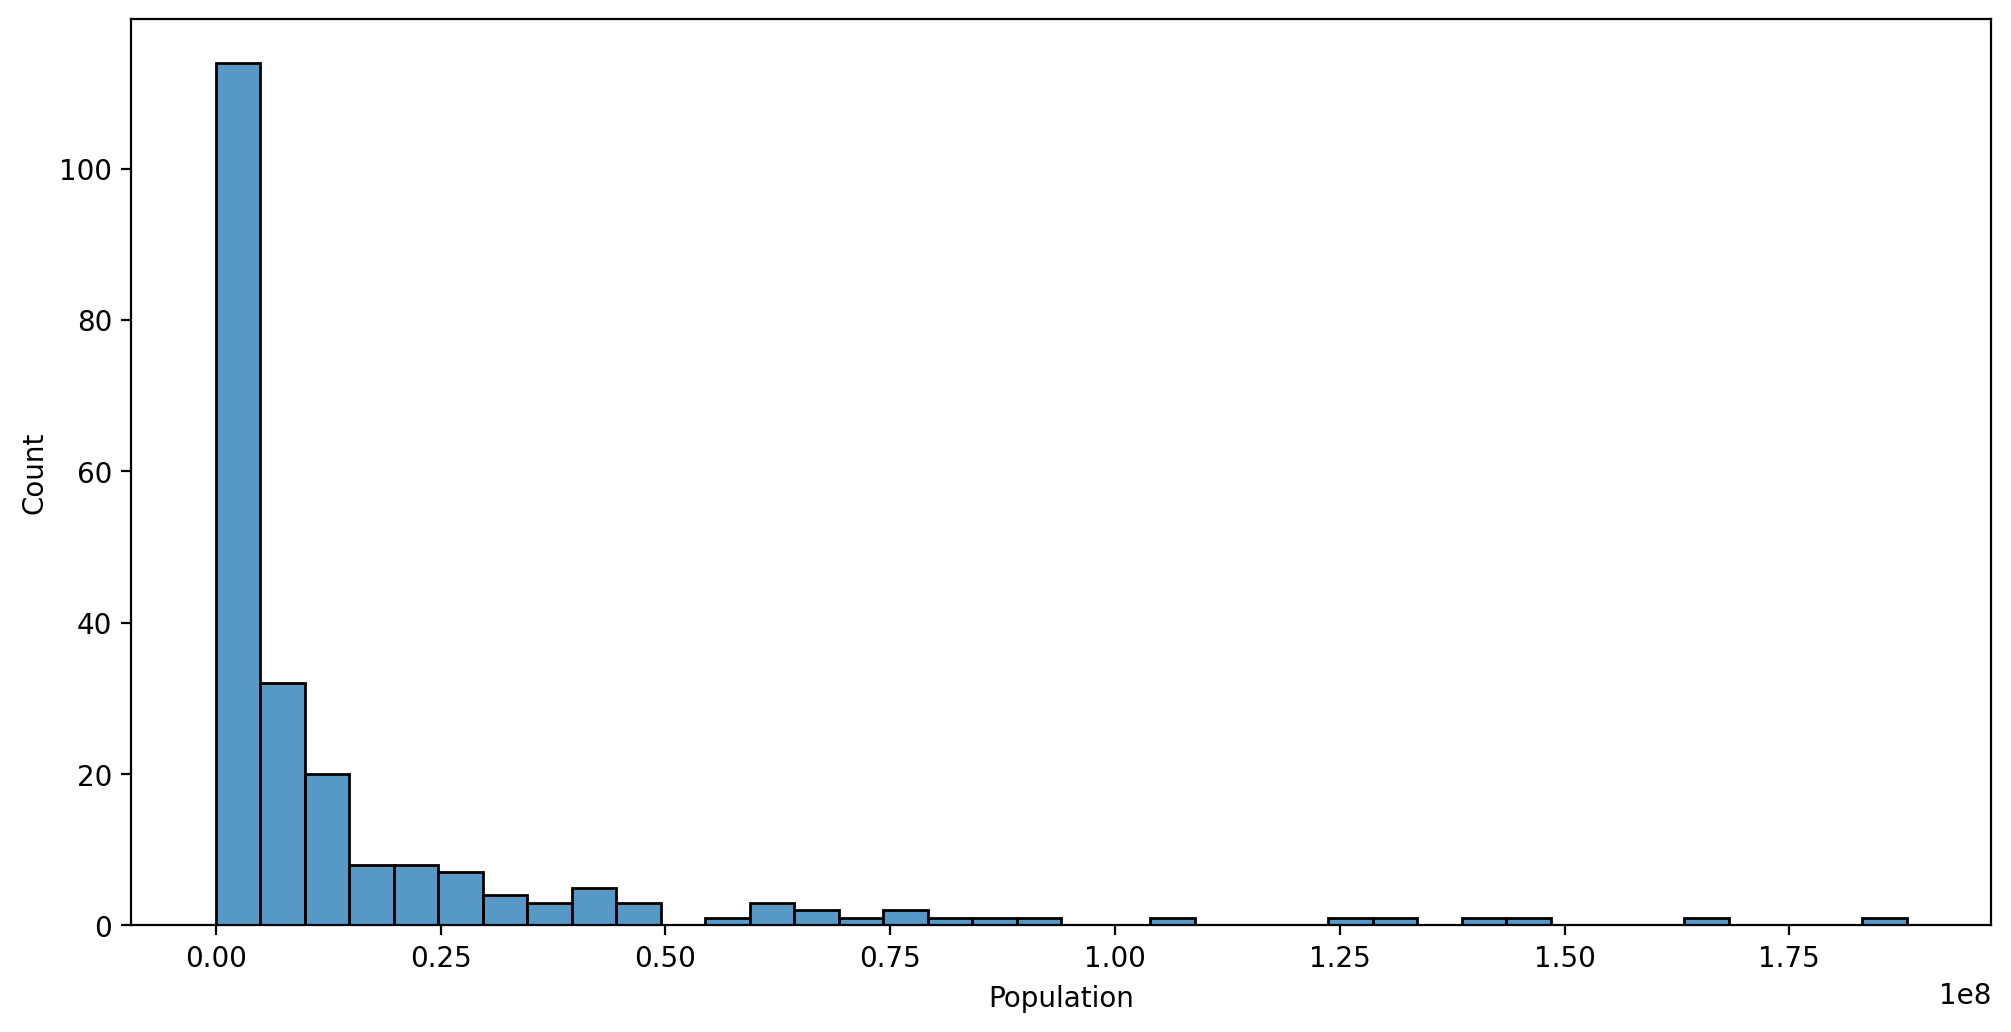

In [57]:
plt.figure(figsize=(12,6), dpi=200)
sns.histplot(data=df[df['Population'] < 200000000], x='Population')

#### Task: Now lets explore GDP and Regions. Create a bar chart showing the mean GDP per Capita region (recall the black bar represents std)

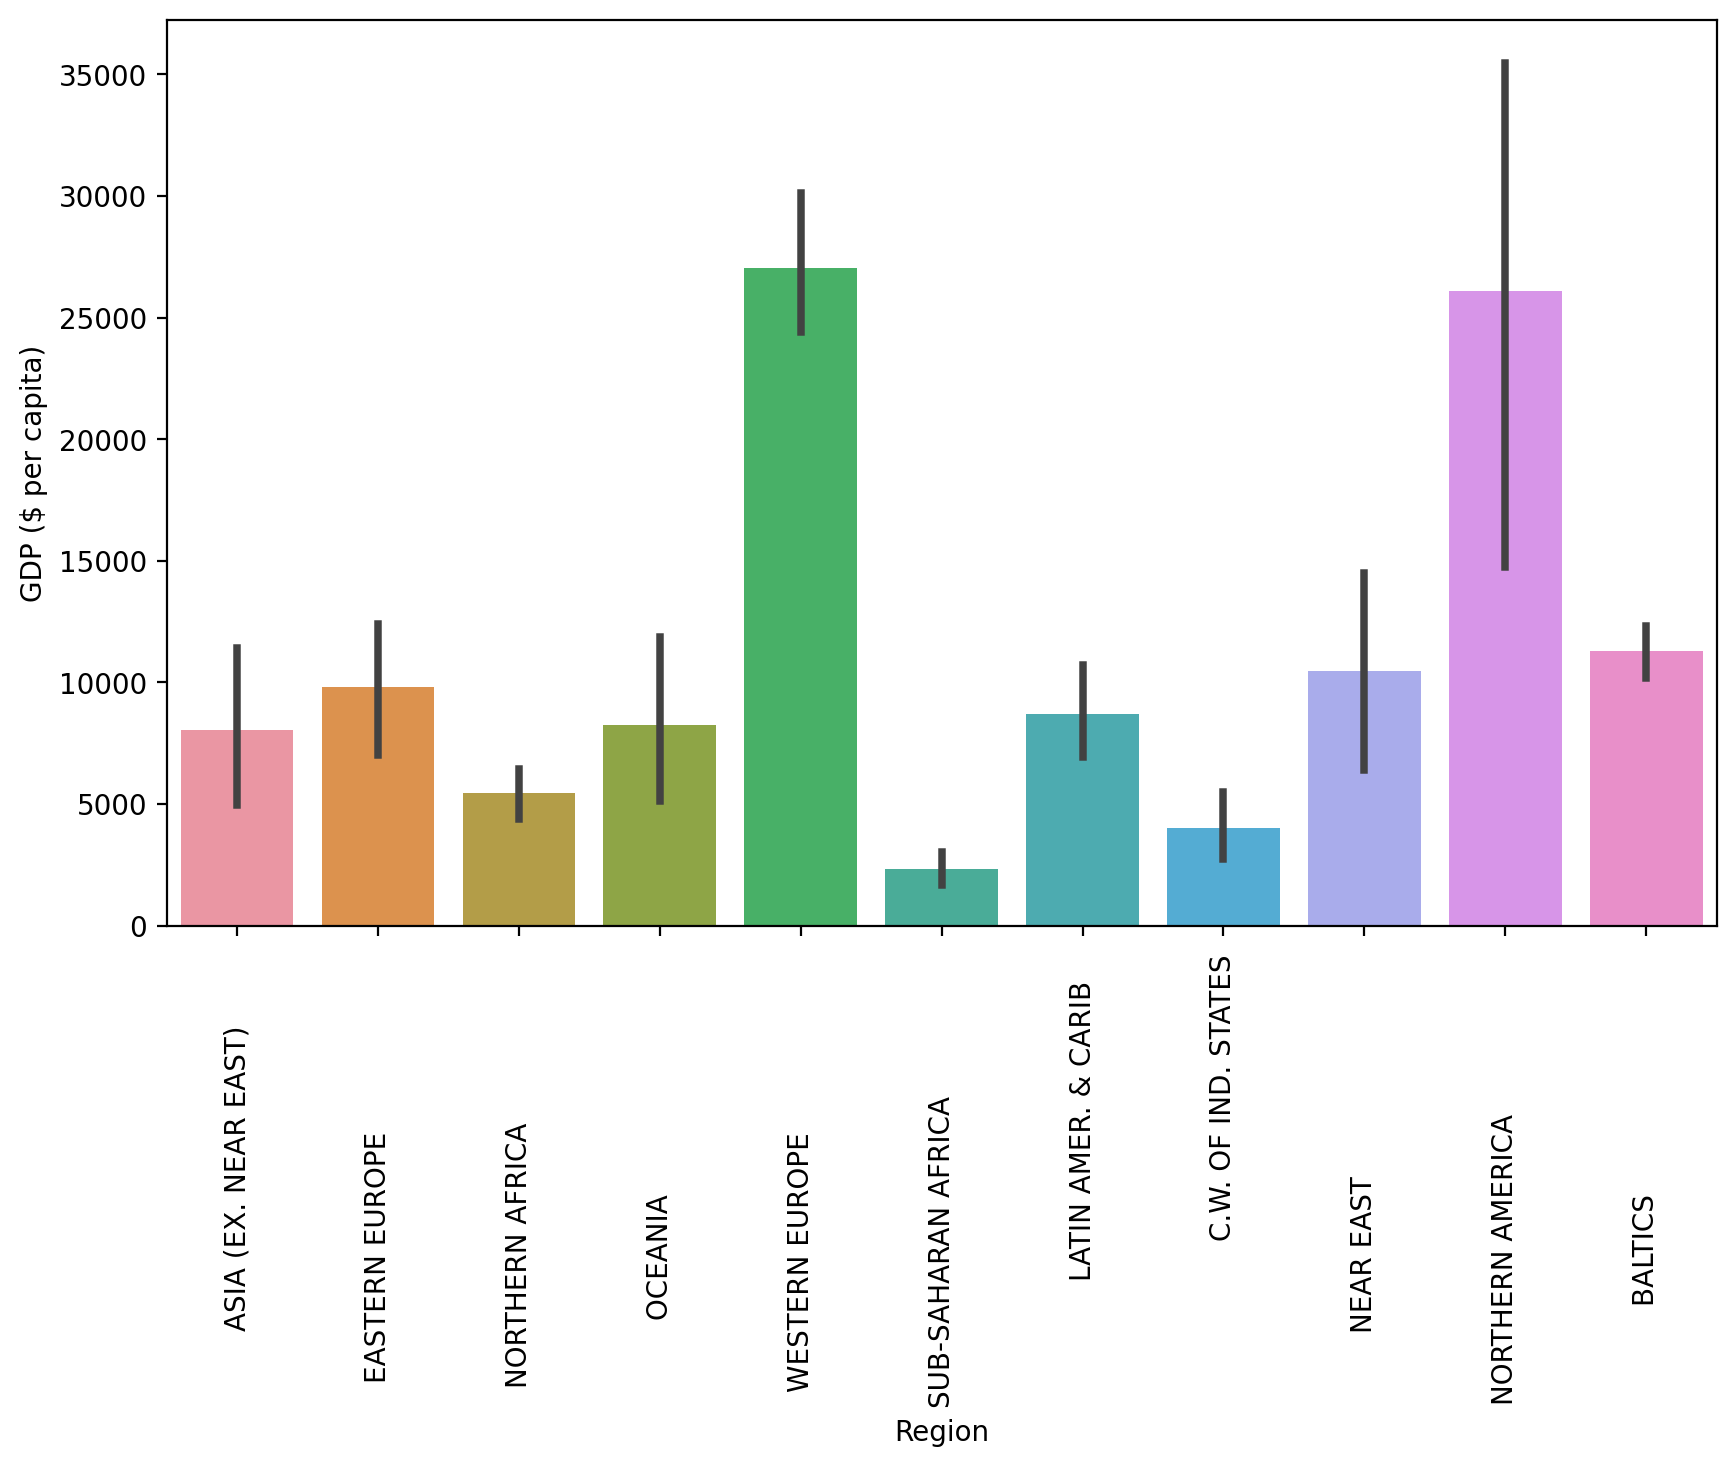

In [58]:
plt.figure(figsize=(10,6), dpi=200)
sns.barplot(data=df, y='GDP ($ per capita)', x='Region')
plt.xticks(rotation=90);

#### Task: create a scatterplot showing the relationship between phones per 1000 people and GDP per Capita. Color these points by Region.

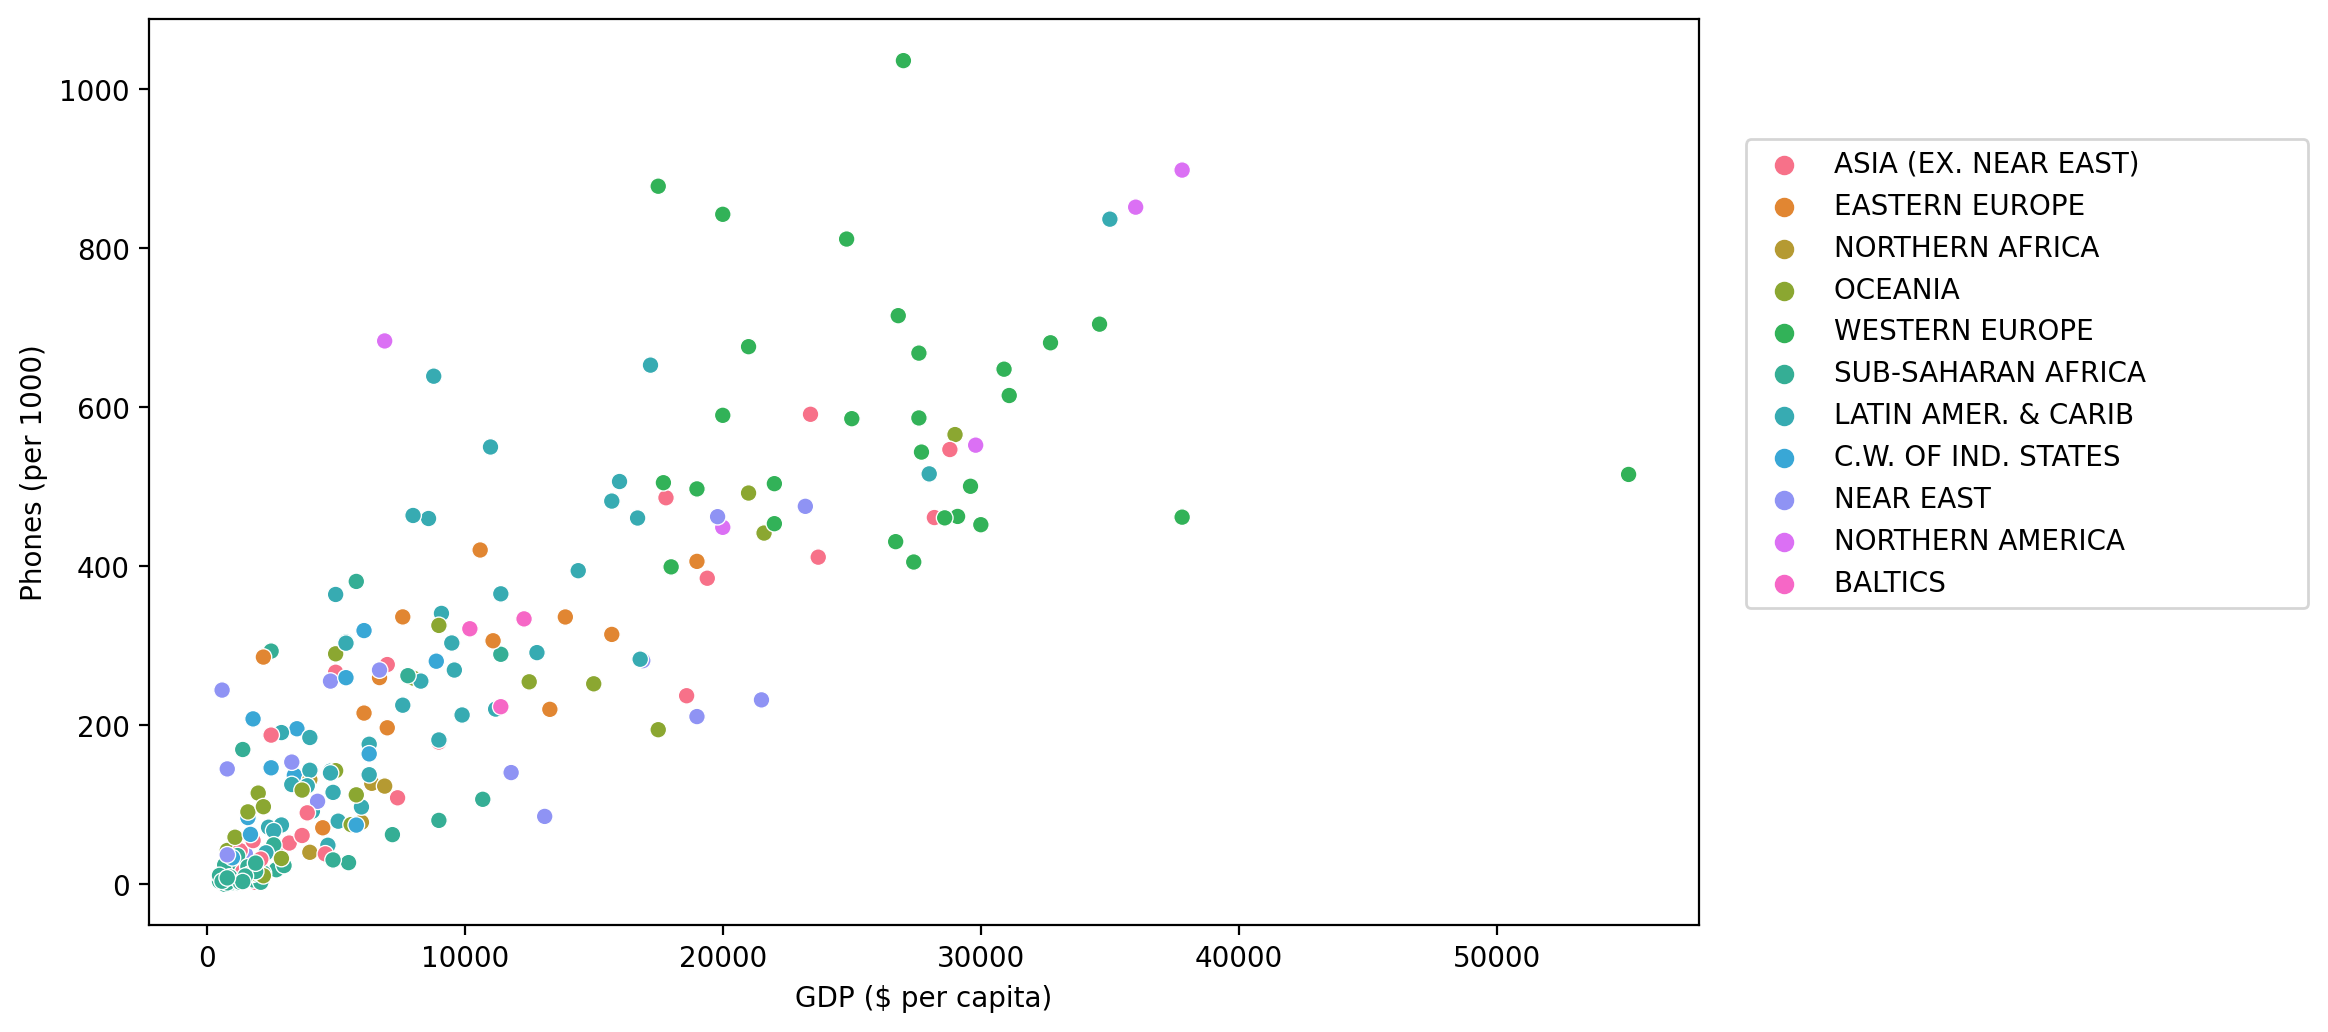

In [59]:
plt.figure(figsize=(10,6), dpi=200)
sns.scatterplot(data=df, x='GDP ($ per capita)', y='Phones (per 1000)', hue='Region')
plt.legend(loc=(1.03, 0.35))

In [60]:
df[df['Phones (per 1000)'] > 900]

df[df['GDP ($ per capita)'] > 50000]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
121,Luxembourg,WESTERN EUROPE,474413,2586,183.5,0.0,8.97,4.81,55100.0,100.0,515.4,23.28,0.4,76.32,NaN,11.94,8.41,0.01,0.13,0.86


#### Task: create a scatterplot showing the relationship between GDP per Capita and Literacy (color the points by Region). What conclusions do you draw from this plot?

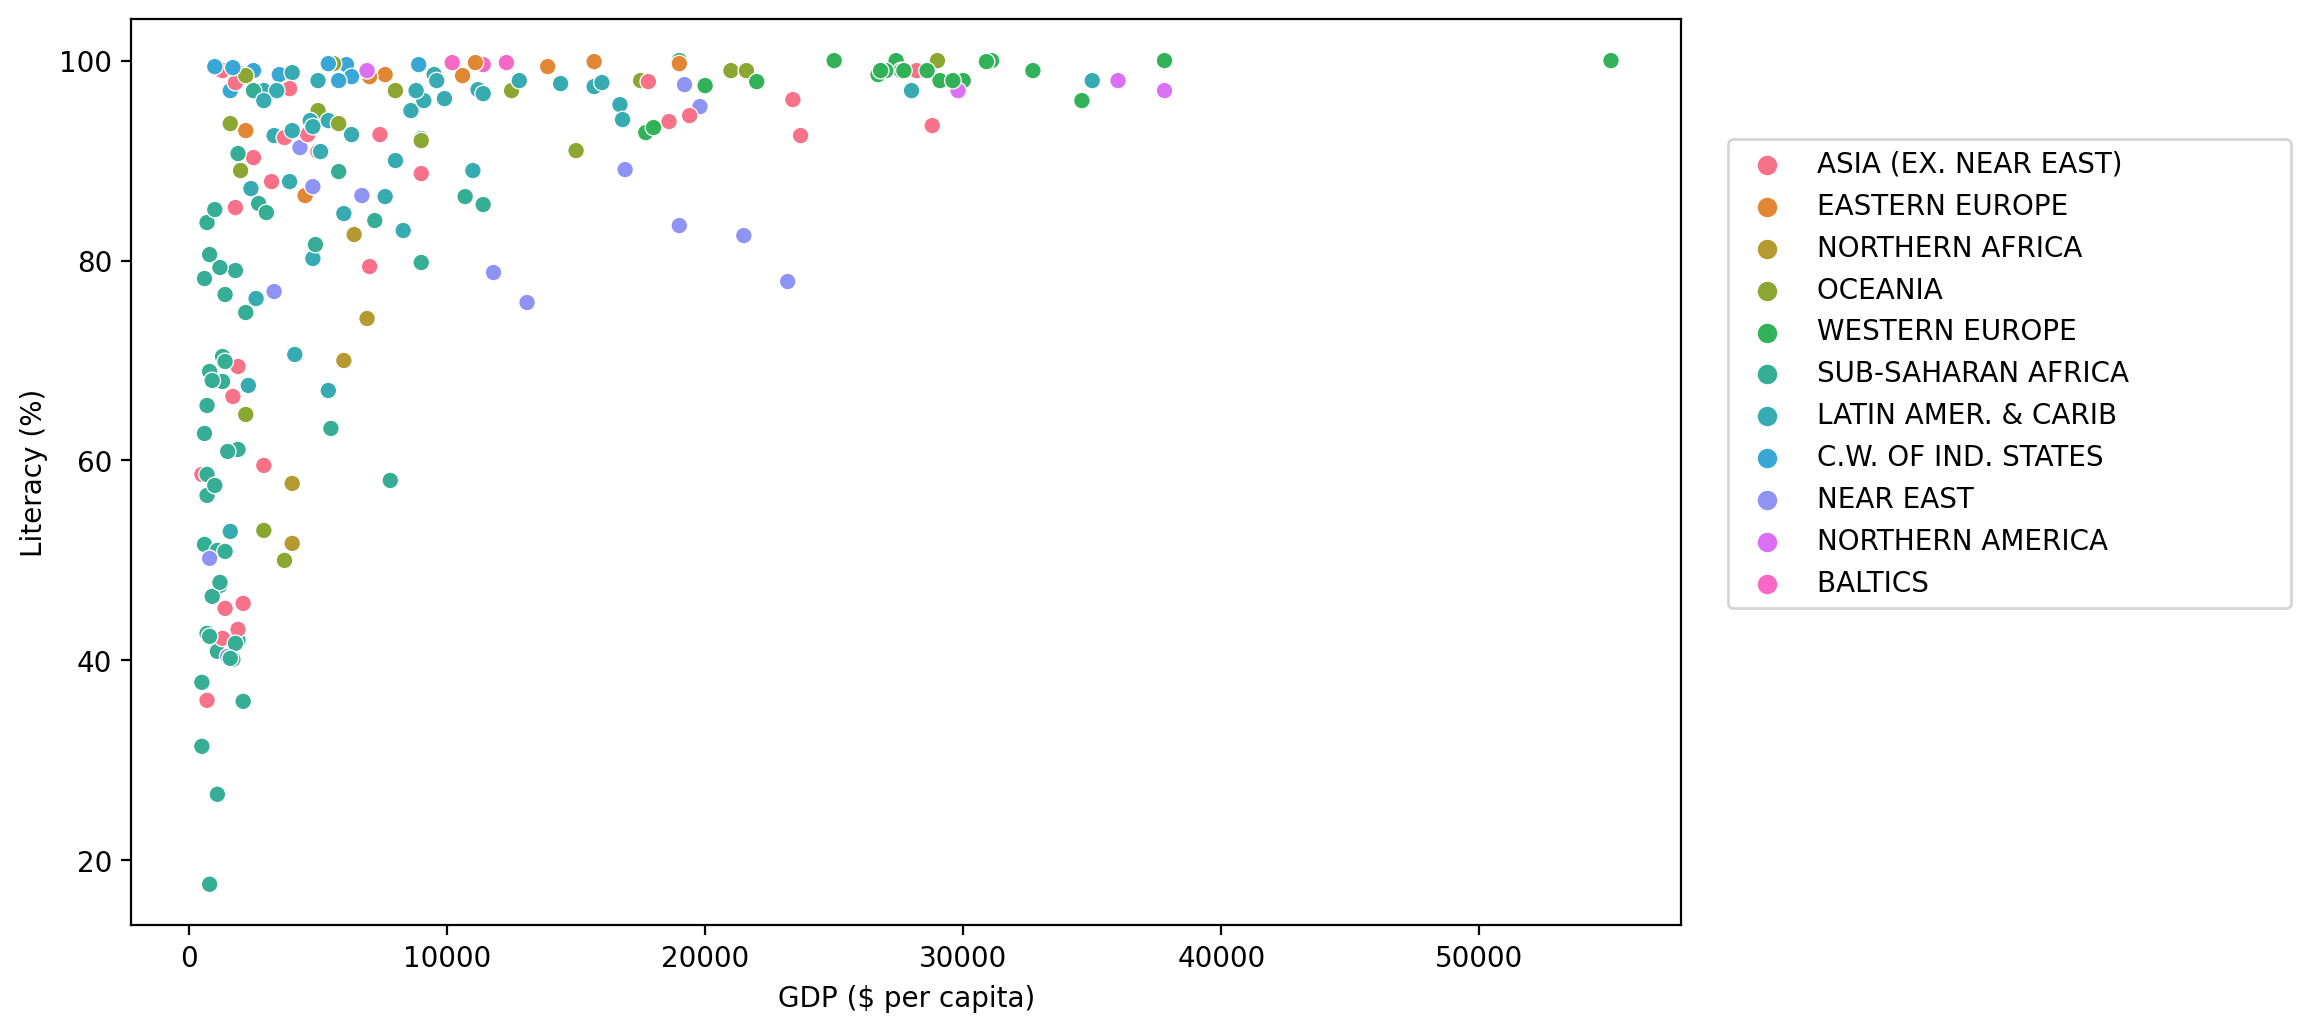

In [61]:
plt.figure(figsize=(10,6), dpi=200)
sns.scatterplot(data=df, x='GDP ($ per capita)', y='Literacy (%)', hue='Region')
plt.legend(loc=(1.03, 0.35))

#### Task: create a heatmap of the Correlation between columns in the DataFrame

<AxesSubplot:>

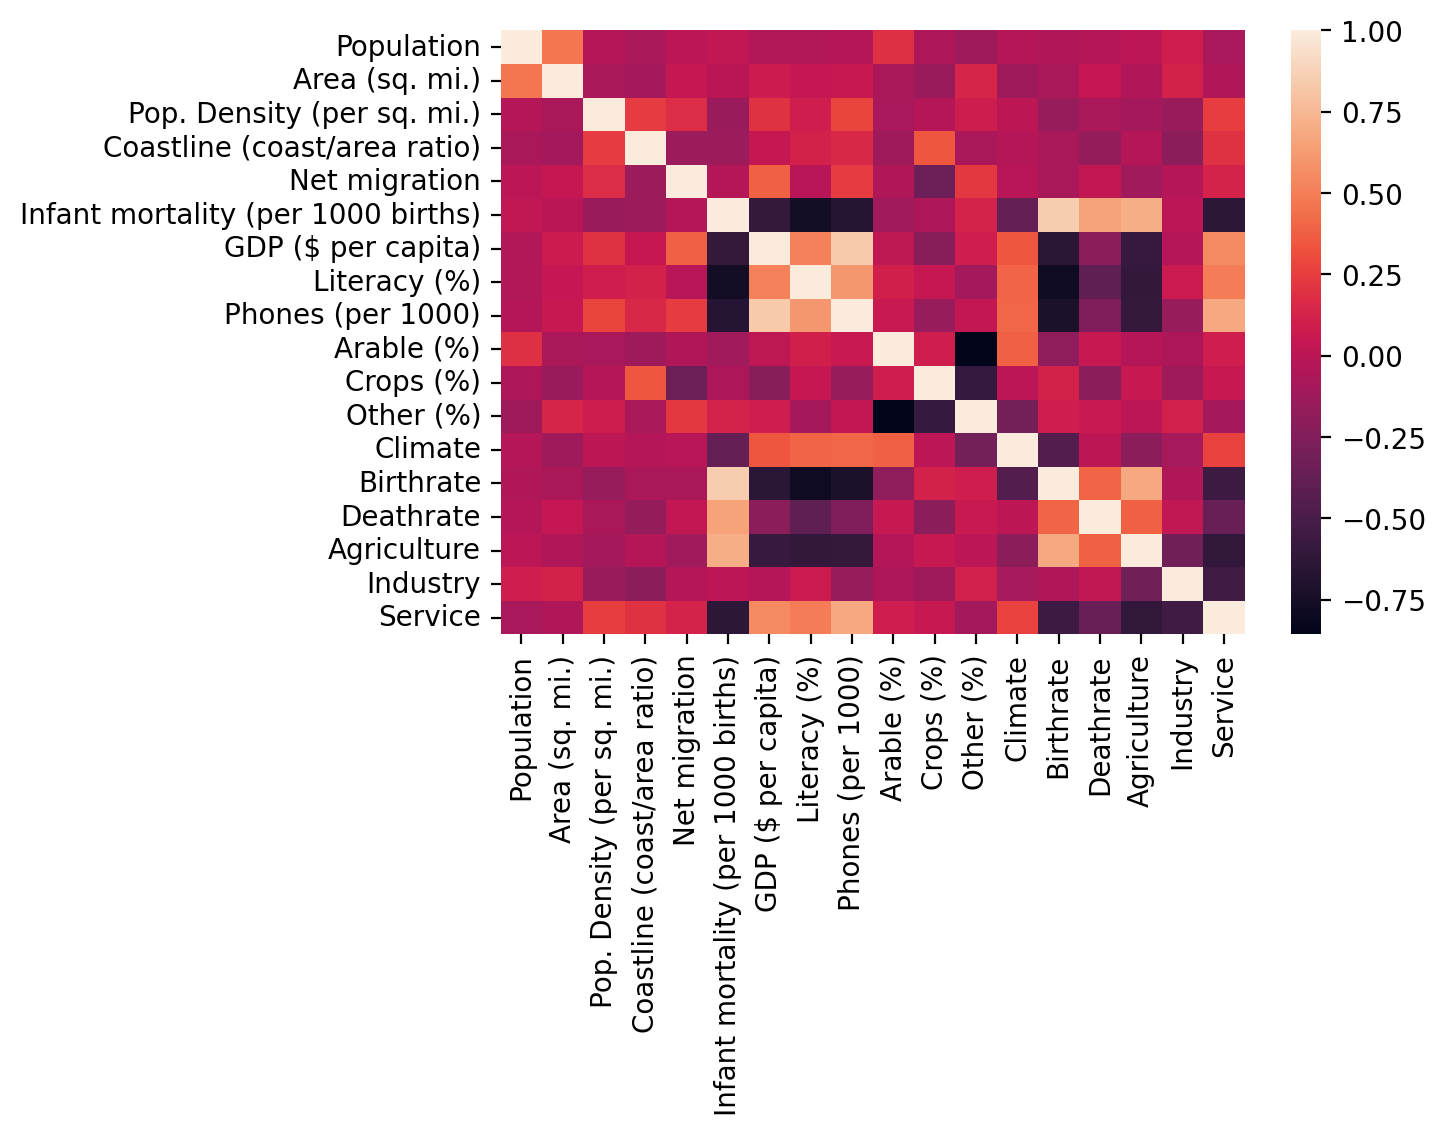

In [62]:
plt.figure(dpi=200)
sns.heatmap(df.corr())

#### Task: seaborn can auto perform hierachal clustering through the clustermap() function.
#### Create a clustermap of the correlations between each column with this function.

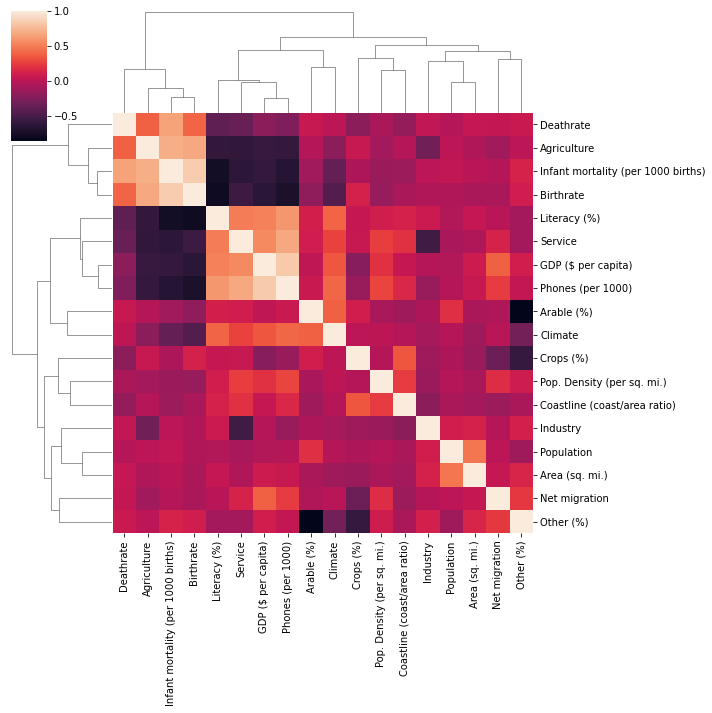

In [63]:
sns.clustermap(df.corr())

## Data Preparation and Model Discovery

Lets prepare our data for Kmeans Clustering!

### Missing Data

#### Task: Report the number of missing elements per column.

In [64]:
df.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

#### Task: what countries have NaN for Agriculture? What is the main aspect of these countries?

In [65]:
df[df['Agriculture'].isnull()] = df[df['Agriculture'].isna()].fillna(0)

#### Task: now check to see what is still missing by counting number of missing elements again per feature

In [66]:
df.isna().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

#### Task: notice climate is missing for a few countries, but not the Region! Lets use this to our advantage. Fill in the missing Climate values based on the mean climate value for its region.

In [67]:
df['Climate'] = df['Climate'].fillna(df.groupby('Region')['Climate'].transform('mean'))

In [68]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                                0
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

In [69]:
df['Literacy (%)'] = df['Literacy (%)'].fillna(df.groupby('Region')['Literacy (%)'].transform('mean'))

In [70]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         1
Infant mortality (per 1000 births)    1
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     2
Arable (%)                            1
Crops (%)                             1
Other (%)                             1
Climate                               0
Birthrate                             1
Deathrate                             2
Agriculture                           0
Industry                              1
Service                               1
dtype: int64

#### Task: we are now missing values for only a few countries. Go ahead and drop these countries or ...

In [71]:
df = df.dropna()

## Data Feature Preparation

#### Task: it is now time to prepare the data for clustering. The country column is still a unique identifier string, so it wont be useful for clustering, since its unique for each point. Go ahead and drop this Country column.

In [74]:
X = df.drop('Country', axis=1)

X = pd.get_dummies(X)

### Scaling

#### Task: Due to some measurements being in terms of percentages and other metrics being total counts (population), we should scale this data first. Use sklearn to scale the X feature matrics

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_X = scaler.fit_transform(X)

### Createing and Fitting Kmeans Model

#### Task: use a for loop to create and fit multiple Kmeans models, testing from k=2-30 clusters. Keep track of the sum of squared distances for each k value, then plot this out to create an 'elbow' plot of K versus SSD.

In [76]:
from sklearn.cluster import KMeans

In [77]:
ssd = []

for k in range(2, 30):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    
    ssd.append(model.inertia_)

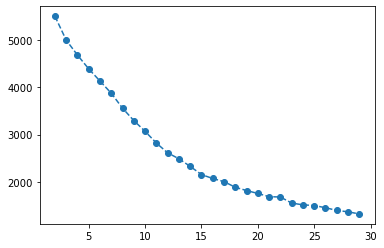

In [79]:
plt.plot(range(2, 30), ssd, 'o--')

<AxesSubplot:>

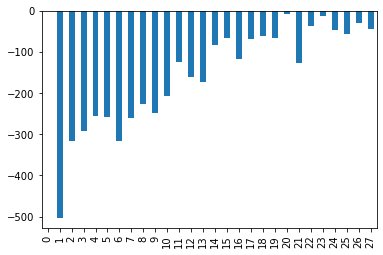

In [80]:
pd.Series(ssd).diff().plot(kind='bar')

### Example Interpretation: K = 3

In [81]:
model = KMeans(n_clusters=3)
model.fit(scaled_X)

KMeans(n_clusters=3)

In [82]:
model.labels_

array([2, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 2,
       1, 2, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 1, 0, 1, 2, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 2, 2, 1, 2, 1, 0, 1,
       1, 0, 0, 2, 2, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 2,
       1, 0, 2, 2, 0, 1, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1, 0, 0, 2, 1, 2, 0,
       0, 1, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2,
       0, 2, 0, 1, 1, 0, 2, 2, 1, 0, 2, 0, 2, 1, 1, 0, 1, 2, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2])

In [83]:
X['K=3 Cluster Labels'] = model.labels_

In [85]:
X.corr()['K=3 Cluster Labels'].sort_values()

Literacy (%)                                 -0.401656
Region_LATIN AMER. & CARIB                   -0.399448
Region_OCEANIA                               -0.282635
Phones (per 1000)                            -0.274905
Region_NEAR EAST                             -0.198862
Coastline (coast/area ratio)                 -0.185429
Crops (%)                                    -0.177370
Region_NORTHERN AFRICA                       -0.149681
GDP ($ per capita)                           -0.139302
Service                                      -0.135541
Region_C.W. OF IND. STATES                   -0.095601
Pop. Density (per sq. mi.)                   -0.095304
Other (%)                                    -0.062636
Area (sq. mi.)                               -0.060182
Population                                   -0.059997
Industry                                     -0.034218
Region_NORTHERN AMERICA                      -0.027429
Region_ASIA (EX. NEAR EAST)                  -0.004624
Region_BAL